## Metadata EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import json
import re
import shutil
import os
from tqdm.auto import tqdm

In [2]:
# To move EDA notebook to data directory
# shutil.move('EDA.ipynb','data')

In [3]:
# Ensure you are in the 'data' directory
# os.chdir('data')
os.getcwd()

'/home/msds2025/cjasmin/term-4-final-projects/art-restoration-ai/notebooks'

#### Open JSON File

In [4]:
with open('../data/canvas_metadata.json', 'r', encoding='utf-8') as f:
    metadata_list = json.load(f)
df = pd.DataFrame(metadata_list)
print(f'Metadata file shape:\n{df.shape}')
print(f'Columns:\n{list(df.columns)}')
df.head()

Metadata file shape:
(34658, 21)
Columns:
['Id', 'URL', 'Title', 'OriginalTitle', 'Author', 'AuthorLink', 'Date', 'Styles', 'Series', 'SeriesLink', 'Genre', 'GenreLink', 'Media', 'Location', 'Dimensions', 'Description', 'WikiDescription', 'WikiLink', 'Tags', 'image_urls', 'images']


,Id,URL,Title,OriginalTitle,Author,AuthorLink,Date,Styles,Series,SeriesLink,...,GenreLink,Media,Location,Dimensions,Description,WikiDescription,WikiLink,Tags,image_urls,images
0,2,https://www.wikiart.org/en/joe-machine/me-and-...,Me and My Grandfather,None,Joe Machine,https://www.wikiart.org/en/joe-machine,None,"[[Stuckism, https://www.wikiart.org/en/paintin...",None,None,...,https://www.wikiart.org/en/paintings-by-genre/...,"[[acrylic, https://www.wikiart.org/en/painting...",None,100 x 80 cm,,,None,[],[https://uploads1.wikiart.org/00226/images/joe...,[{'url': 'https://uploads1.wikiart.org/00226/i...
1,1,https://www.wikiart.org/en/joe-machine/sex-cri...,Sex Crime Variation 2,None,Joe Machine,https://www.wikiart.org/en/joe-machine,None,"[[Stuckism, https://www.wikiart.org/en/paintin...",None,None,...,https://www.wikiart.org/en/paintings-by-genre/...,"[[acrylic, https://www.wikiart.org/en/painting...",None,99 x 38 cm,,,None,[],[https://uploads2.wikiart.org/00226/images/joe...,[{'url': 'https://uploads2.wikiart.org/00226/i...
2,0,https://www.wikiart.org/en/joe-machine/two-gir...,Two Girlies,None,Joe Machine,https://www.wikiart.org/en/joe-machine,None,"[[Stuckism, https://www.wikiart.org/en/paintin...",None,None,...,https://www.wikiart.org/en/paintings-by-genre/...,"[[acrylic, https://www.wikiart.org/en/painting...",None,122 x 91 cm,,,None,"[female-nude, Human]",[https://uploads2.wikiart.org/00226/images/joe...,[{'url': 'https://uploads2.wikiart.org/00226/i...
3,3,https://www.wikiart.org/en/joe-machine/my-moth...,My Mother's Last Cigarette,None,Joe Machine,https://www.wikiart.org/en/joe-machine,None,"[[Stuckism, https://www.wikiart.org/en/paintin...",None,None,...,https://www.wikiart.org/en/paintings-by-genre/...,"[[acrylic, https://www.wikiart.org/en/painting...",None,100 x 80 cm,,,None,[],[https://uploads4.wikiart.org/00226/images/joe...,[{'url': 'https://uploads4.wikiart.org/00226/i...
4,4,https://www.wikiart.org/en/joe-machine/until-t...,Until the Last Dog is Hung,None,Joe Machine,https://www.wikiart.org/en/joe-machine,None,"[[Stuckism, https://www.wikiart.org/en/paintin...",None,None,...,https://www.wikiart.org/en/paintings-by-genre/...,"[[acrylic, https://www.wikiart.org/en/painting...",None,80 x 100 cm,,,None,"[Mammal, Vertebrate, Dog, Canidae, American pi...",[https://uploads4.wikiart.org/00226/images/joe...,[{'url': 'https://uploads4.wikiart.org/00226/i...


#### Artist

In [5]:
print(f"Total Number of Artists: {df['Author'].nunique()}")
print(f"Null Artists: {df['Author'].isna().sum()}")

Total Number of Artists: 1199
Null Artists: 0


/tmp/ipykernel_4481/1534793745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_100_artists_df.index, y=top_100_artists_df.values, palette='viridis')


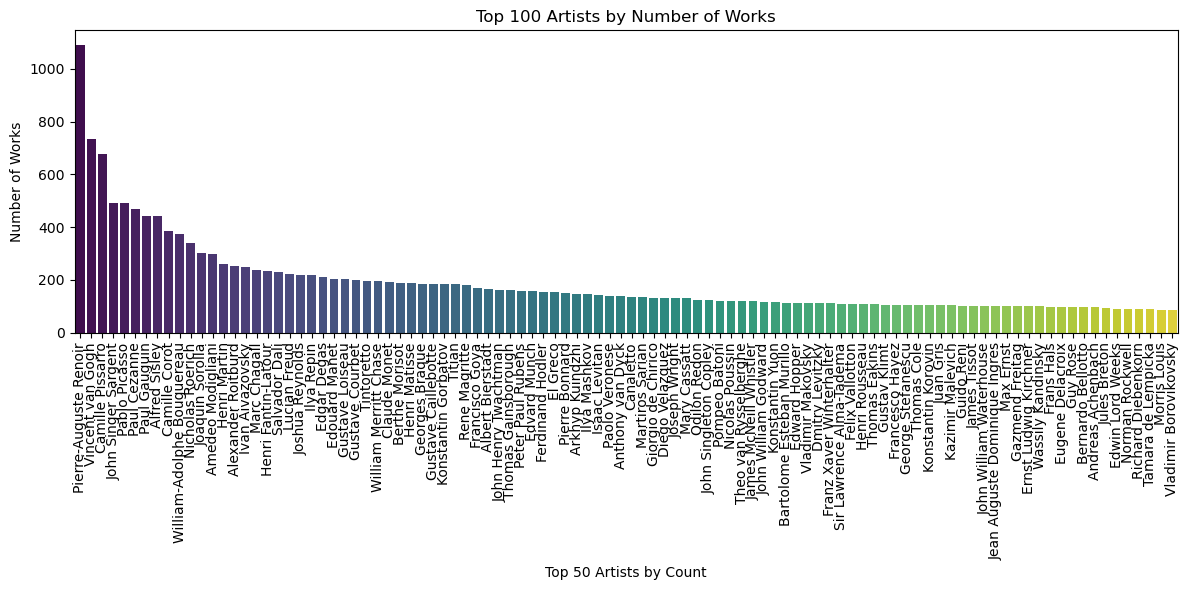

In [6]:
plt.figure(figsize=(12, 6))
top_100_artists_df = df['Author'].value_counts(dropna=True).nlargest(100)
sns.barplot(x=top_100_artists_df.index, y=top_100_artists_df.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Top 50 Artists by Count')
plt.ylabel('Number of Works')
plt.title('Top 100 Artists by Number of Works')
plt.tight_layout()
plt.show()

#### Style

In [7]:
print(f"Total Number of Styles: {len(df['Styles'])}")
print(f"Null Styles: {df['Styles'].isna().sum()}")

Total Number of Styles: 34658
Null Styles: 0


In [8]:
def extract_primary_style(style_list):
    if isinstance(style_list, list) and len(style_list) > 0:
        first_entry = style_list[0]
        if isinstance(first_entry, list) and len(first_entry) > 0:
            return first_entry[0] # This is the style name
    return None

In [9]:
df_styles = df['Styles'].apply(extract_primary_style)
style_count = df_styles.value_counts()
style_count

Styles
Impressionism         5579
Realism               4761
Romanticism           3217
Baroque               2520
Post-Impressionism    2500
                      ... 
Fantasy Art              1
Ukiyo-e                  1
Nouveau Réalisme         1
Tubism                   1
Purism                   1
Name: count, Length: 116, dtype: int64

/tmp/ipykernel_4481/194976659.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=style_count.index, y=style_count.values, palette='viridis')


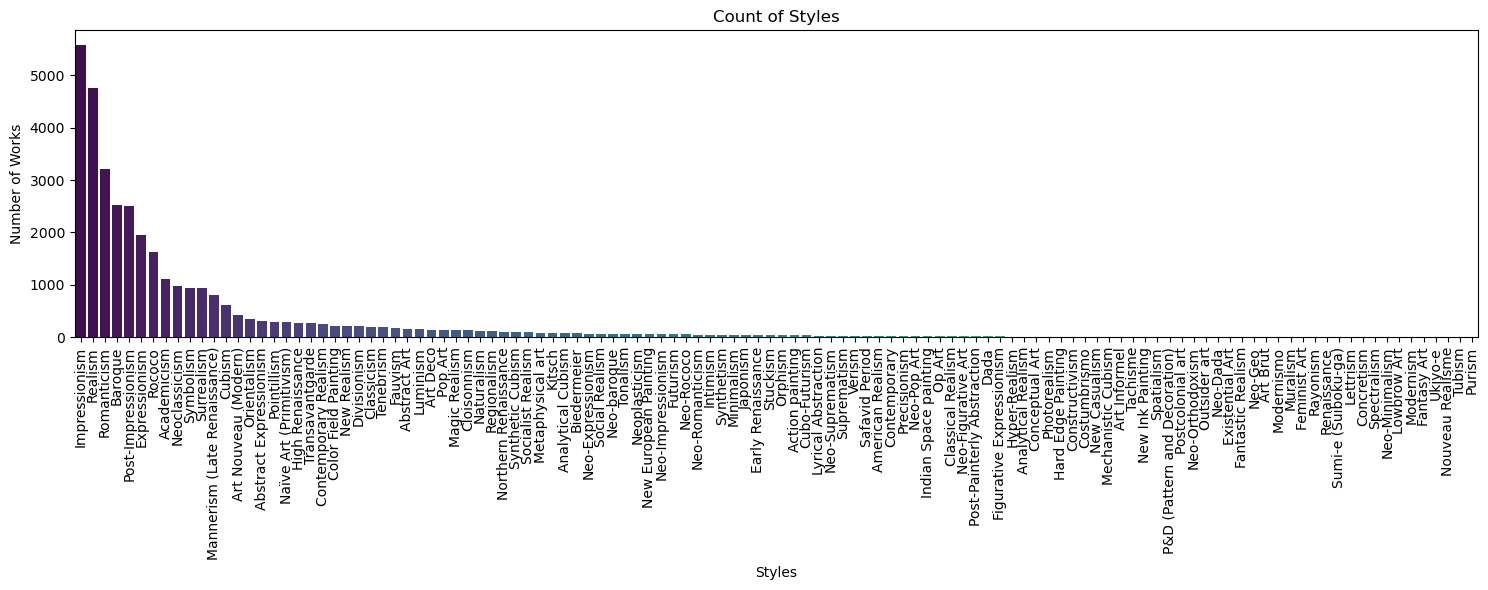

In [10]:
plt.figure(figsize=(15, 6))
style_count = df_styles.value_counts()
sns.barplot(x=style_count.index, y=style_count.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Styles')
plt.ylabel('Number of Works')
plt.title('Count of Styles')
plt.tight_layout()
plt.show()

#### Media

In [11]:
print(f"Total Number of Entries in 'Media' column: {len(df['Media'])}")
print(f"Null 'Media' entries (actual None): {df['Media'].isna().sum()}")
# Also count entries that are empty lists, as they effectively have no media
empty_list_count = df['Media'].apply(lambda x: isinstance(x, list) and len(x) == 0).sum()
print(f"Empty list 'Media' entries: {empty_list_count}")

Total Number of Entries in 'Media' column: 34658
Null 'Media' entries (actual None): 0
Empty list 'Media' entries: 0


In [12]:
def extract_media_combination(media_data_list):
    """
    Extracts media names from the list of lists, sorts them,
    and returns a comma-separated string of the combination.
    Example input: [['acrylic', 'url1'], ['canvas', 'url2']]
    Example output: "acrylic, canvas"
    """
    if not isinstance(media_data_list, list) or not media_data_list:
        return None # Handles None, empty list, or non-list types

    media_names = []
    for item in media_data_list:
        if isinstance(item, list) and len(item) > 0 and isinstance(item[0], str):
            media_names.append(item[0].strip().lower()) # Standardize: strip whitespace, lowercase
        # else: # Optional: log malformed inner entries
            # print(f"Warning: Malformed media item found: {item}")

    if not media_names:
        return None

    # Sort names to make combinations consistent (e.g., "acrylic, canvas" is same as "canvas, acrylic")
    media_names.sort()
    return ', '.join(media_names)

In [13]:
df_media_combinations = df['Media'].apply(extract_media_combination)

media_combination_counts = df_media_combinations.value_counts(dropna=True) # dropna=True is default but explicit

print("\n--- Unique Media Combinations and their Counts ---")
print(media_combination_counts)

# Plotting the counts
# For better readability, you might want to plot only the top N combinations
top_n = 20 # Adjust as needed
media_combination_counts_top_n = media_combination_counts.head(top_n)


--- Unique Media Combinations and their Counts ---
Media
canvas, oil                          32842
canvas, tempera                        473
acrylic, canvas                        441
canvas                                 104
canvas, pastel                          62
                                     ...  
canvas, gouache, oil, pastel             1
acrylic, canvas, charcoal, pencil        1
canvas, lithography, oil                 1
canvas, crayon, ink, oil                 1
canvas, graphite, oil, pastel            1
Name: count, Length: 186, dtype: int64


/tmp/ipykernel_4481/89494132.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_combination_counts_top_n.index, y=media_combination_counts_top_n.values, palette='viridis')


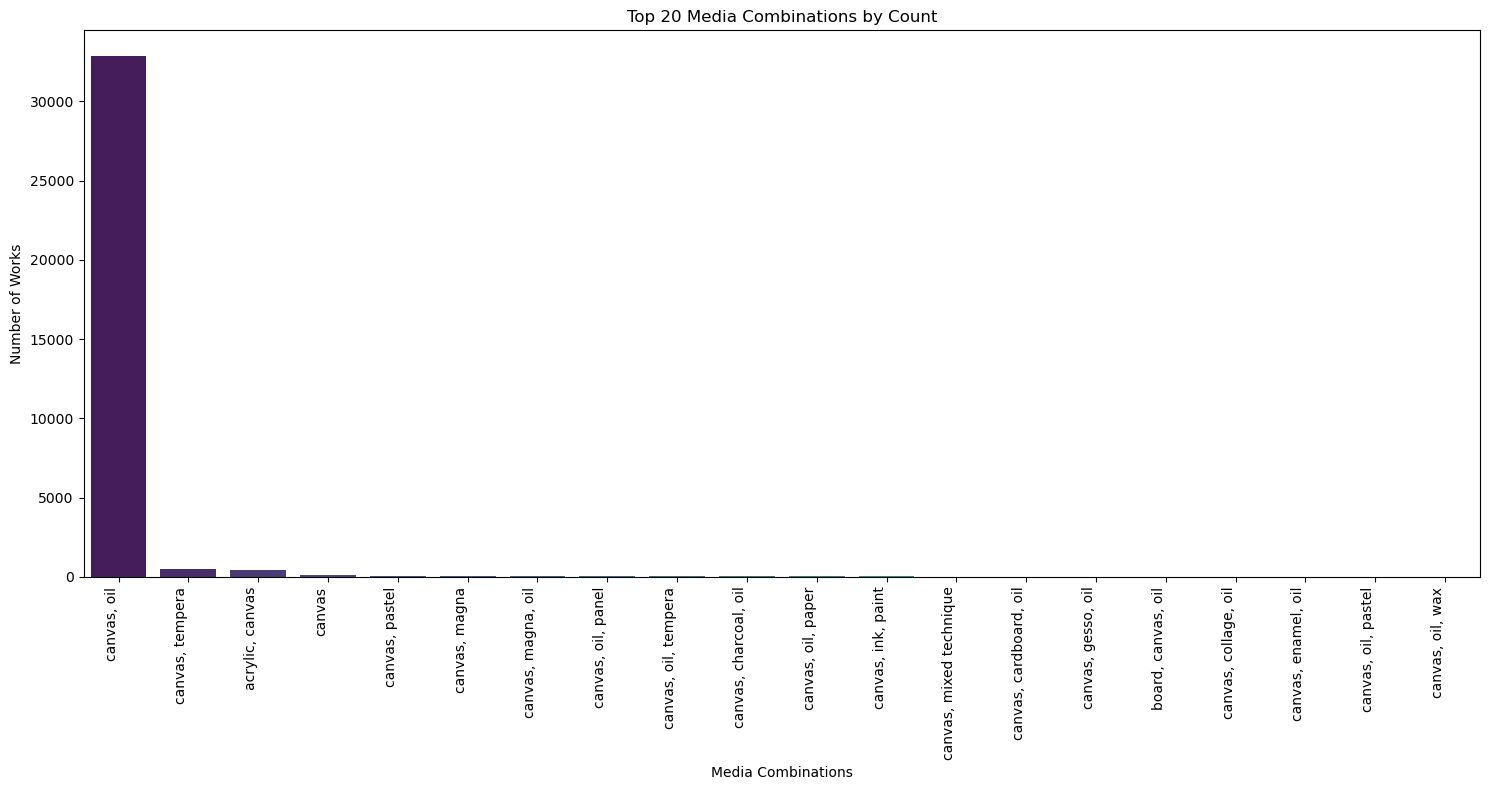

In [14]:
if not media_combination_counts_top_n.empty:
    plt.figure(figsize=(15, 8)) # Adjust figure size as needed
    sns.barplot(x=media_combination_counts_top_n.index, y=media_combination_counts_top_n.values, palette='viridis')
    plt.xticks(rotation=90, ha='right') # Rotate labels for readability
    plt.xlabel('Media Combinations')
    plt.ylabel('Number of Works')
    plt.title(f'Top {top_n} Media Combinations by Count')
    plt.tight_layout() # Adjust layout to make room for labels
    plt.show()
else:
    print("\nNo media combinations found to plot (after potential filtering or if all were None).")

#### Genre

In [15]:
print(f"Total Number of Genre: {df['Genre'].nunique()}")
print(f"Null Genre: {df['Genre'].isna().sum()}")

Total Number of Genre: 43
Null Genre: 81


/tmp/ipykernel_4481/3884766379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.index, y=genre_count.values, palette='viridis')


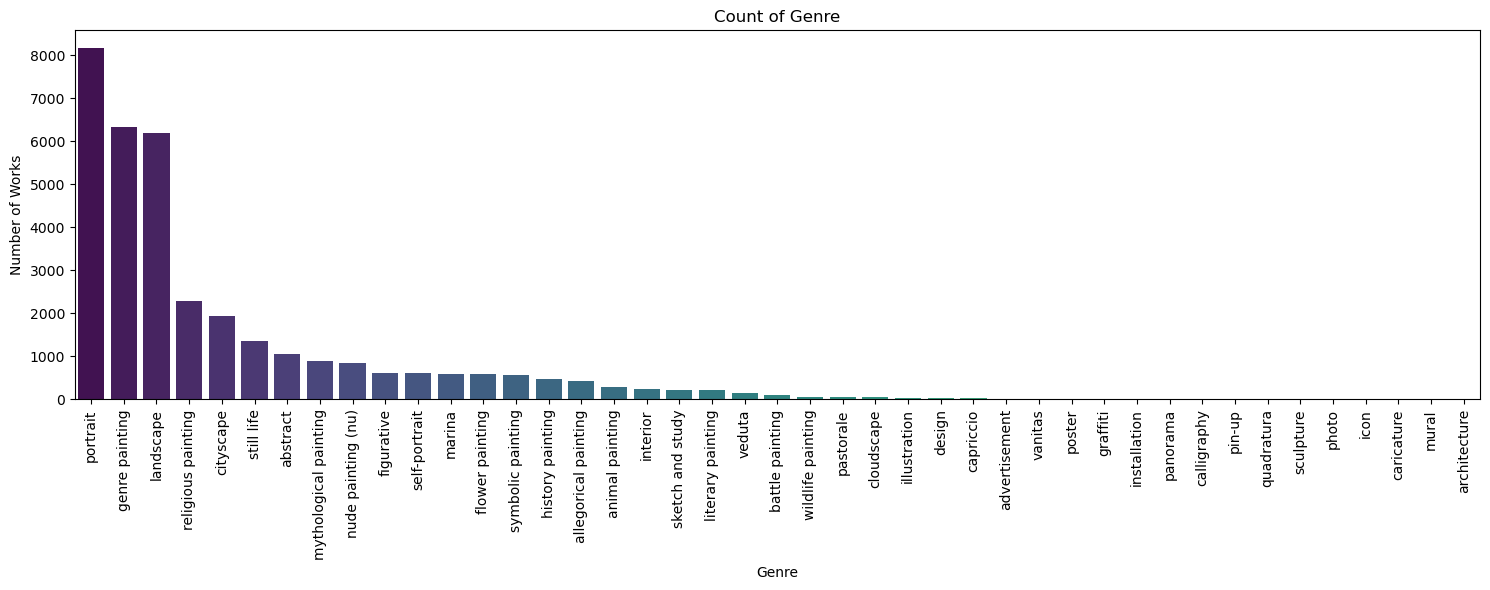

In [16]:
plt.figure(figsize=(15, 6))
genre_count = df['Genre'].value_counts()
sns.barplot(x=genre_count.index, y=genre_count.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Works')
plt.title('Count of Genre')
plt.tight_layout()
plt.show()

#### Date

In [17]:
year_df = df['Date'].astype(str).str.extract(r'(\d{4})')
type(year_df.value_counts().sort_index())

pandas.core.series.Series

In [18]:
year_count = year_df[0].value_counts().sort_index()
year_count.index

Index(['1431', '1445', '1448', '1450', '1455', '1458', '1459', '1460', '1461',
       '1465',
       ...
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object', name=0, length=548)

In [19]:
decade_series = year_df[0].dropna().astype(int)
decades = (decade_series // 10) * 10

decade_count = decades.value_counts().sort_index()

/tmp/ipykernel_4481/847575295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_count.index, y=decade_count.values, palette='viridis')


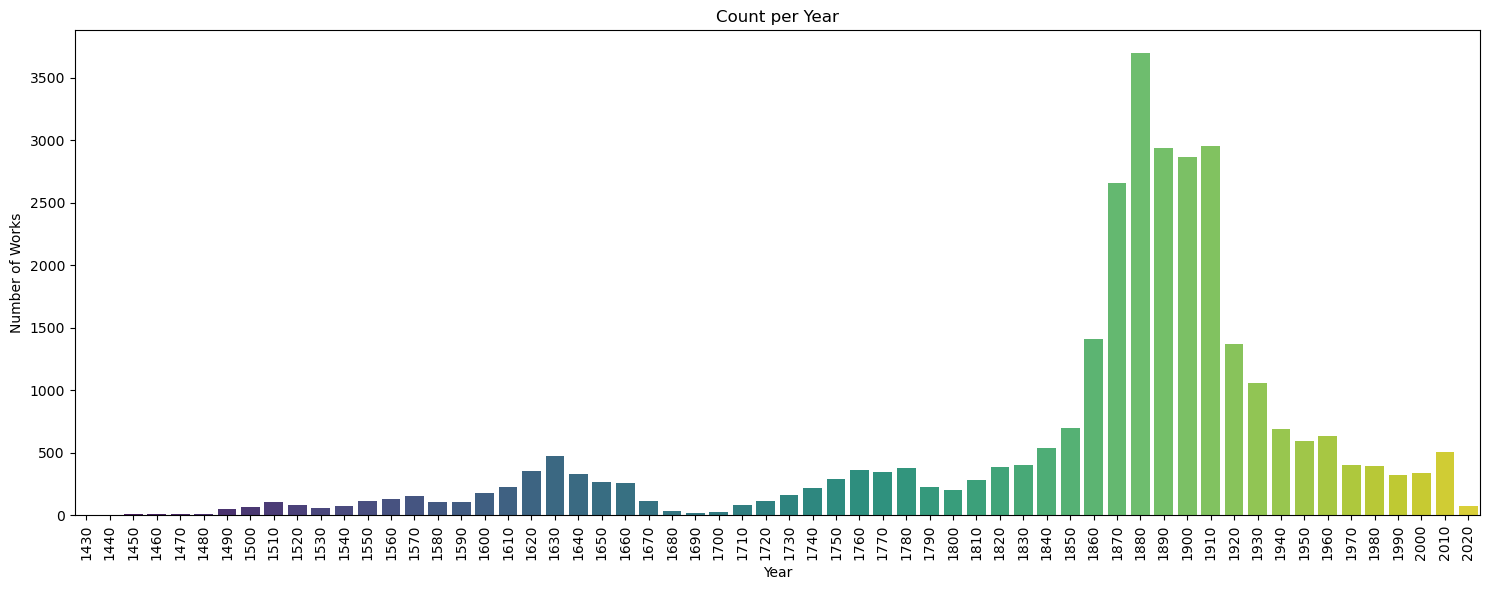

In [20]:
plt.figure(figsize=(15, 6))
year_count = year_df[0].value_counts().sort_index()
sns.barplot(x=decade_count.index, y=decade_count.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of Works')
plt.title('Count per Year')
plt.tight_layout()
plt.show()

#### Dimensions

In [21]:
dimensions_dict = df.Dimensions.value_counts().to_dict()

In [22]:
# parse_dimension_string(dimensions_dict)

In [23]:
# --- Function to parse dimension strings ---
def parse_dimension_string(dim_str):
    """
    Parses a dimension string like "73 x 92 cm" into (height, width).
    Assumes the format is generally "number separator number units".
    Returns (None, None) if parsing fails.
    """
    if pd.isna(dim_str):
        return None, None
    
    dim_str_cleaned = str(dim_str).lower()
    dim_str_cleaned = re.sub(r'[^\d.x\-]', '', dim_str_cleaned) # Keep digits, '.', 'x', '-'
    
    # Try splitting by 'x' or '-'
    parts = re.split(r'[x\-]', dim_str_cleaned)
    
    numeric_parts = []
    for part in parts:
        try:
            if part: # Ensure part is not empty string
                num = float(part)
                if num > 0: # Dimensions should be positive
                    numeric_parts.append(num)
        except ValueError:
            continue
            
    if len(numeric_parts) >= 2:
        # Assuming convention: Height x Width (or first found is H, second is W)
        return numeric_parts[0], numeric_parts[1]
    elif len(numeric_parts) == 1:
        # If only one dimension, could be diameter or side of a square.
        # For now, assign to height and leave width None, or handle as per your convention.
        return numeric_parts[0], None 
    return None, None

In [24]:
# --- Unroll the data based on counts ---
all_heights = []
all_widths = []
all_aspect_ratios = []

for dim_string, count in dimensions_dict.items():
    height, width = parse_dimension_string(dim_string)
    
    if height is not None and width is not None:
        aspect_ratio = height / width if width > 0 else 0 # Or width / height depending on convention
        
        all_heights.extend([height] * count)
        all_widths.extend([width] * count)
        all_aspect_ratios.extend([aspect_ratio] * count)
        # print(f"Parsed: '{dim_string}' -> H:{height}, W:{width}, AR:{aspect_ratio}, Count:{count}")
    elif height is not None and width is None: # Case where only one dimension was parsed
        # Decide how to handle this - e.g. assume square, or skip aspect ratio
        all_heights.extend([height] * count)
        all_widths.extend([None] * count) # Or [height]*count if assuming square
        # all_aspect_ratios.extend([1.0] * count) # If assuming square
        print(f"Parsed (only height): '{dim_string}' -> H:{height}, Count:{count}")
    else:
        print(f"Warning: Could not parse dimension string: '{dim_string}'")

In [25]:
num_missing_heights = sum(h is None for h in all_heights)
num_missing_widths = sum(w is None for w in all_widths)
print(f"Missing heights: {num_missing_heights}")
print(f"Missing widths: {num_missing_widths}")

Missing heights: 0
Missing widths: 0



--- Descriptive Statistics for Parsed Dimensions ---
Height statistics:
count    20737.000000
mean       100.542583
std        327.830000
min          1.000000
25%         54.500000
50%         76.800000
75%        119.000000
max      45992.000000
Name: image_height, dtype: float64

Width statistics:
count    20737.000000
mean       107.028428
std        513.037992
min          1.010000
25%         55.000000
50%         78.200000
75%        117.500000
max      40691.000000
Name: image_width, dtype: float64

Aspect Ratio (W/H) statistics:
count    20737.000000
mean         1.291601
std         18.088660
min          0.000207
25%          0.776812
50%          1.000000
75%          1.318182
max       1937.571429
Name: aspect_ratio_wh, dtype: float64


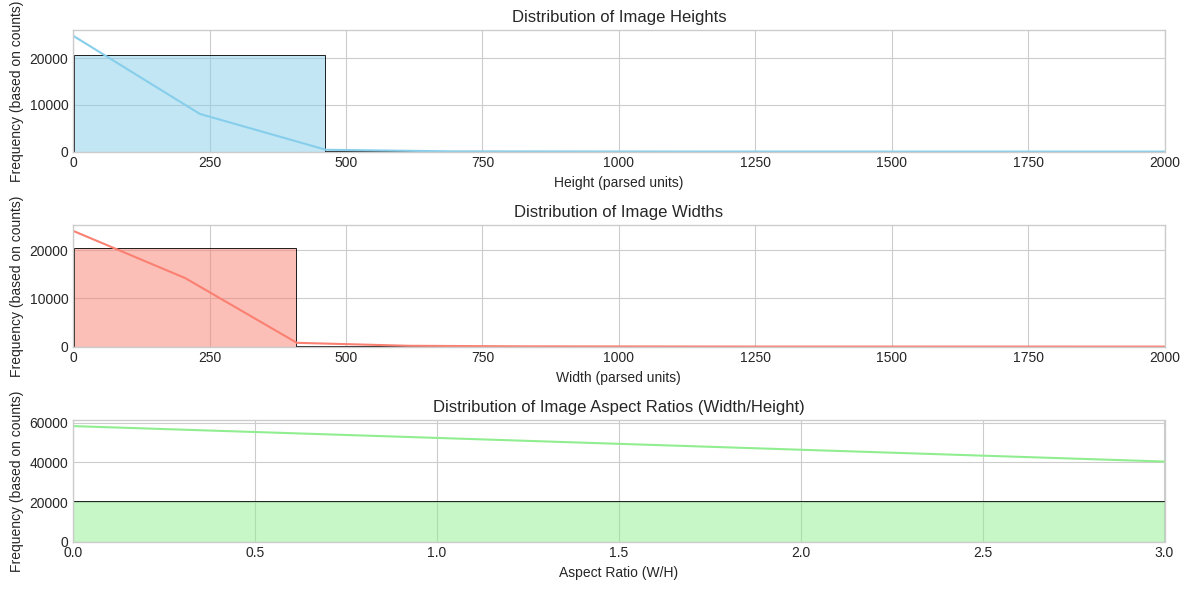

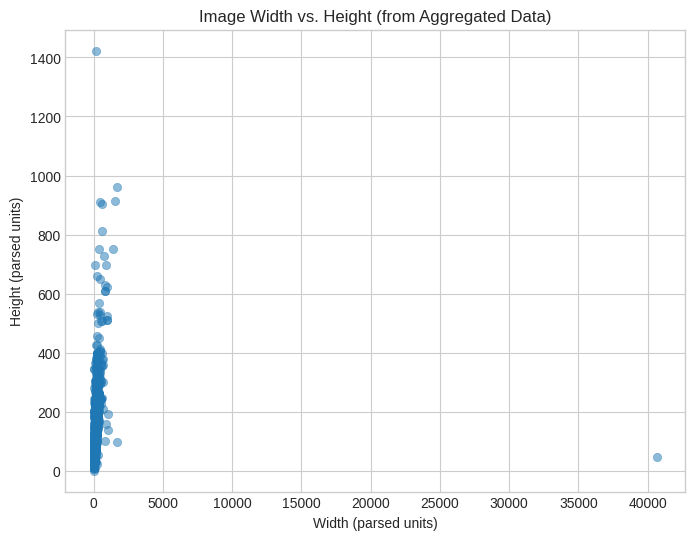

In [26]:
# Create a DataFrame from the unrolled data
if all_heights: # Check if any data was successfully parsed
    parsed_df = pd.DataFrame({
        'image_height': all_heights,
        'image_width': all_widths,
        'aspect_ratio': all_aspect_ratios # Will contain NaNs if width was None
    })
    parsed_df.dropna(subset=['image_height', 'image_width'], inplace=True) # Ensure both H and W for aspect ratio analysis
    
    # Recalculate aspect ratio for the cleaned DataFrame
    # Assuming convention: Width / Height for aspect ratio plots generally
    parsed_df['aspect_ratio_wh'] = parsed_df['image_width'] / parsed_df['image_height']


    print("\n--- Descriptive Statistics for Parsed Dimensions ---")
    print("Height statistics:")
    print(parsed_df['image_height'].describe())
    print("\nWidth statistics:")
    print(parsed_df['image_width'].describe())
    print("\nAspect Ratio (W/H) statistics:")
    print(parsed_df['aspect_ratio_wh'].describe())

    # --- Plotting ---
    plt.style.use('seaborn-v0_8-whitegrid')

    # Histograms
    fig, axes = plt.subplots(3, 1, figsize=(12, 6))
    
    sns.histplot(parsed_df['image_height'], kde=True, ax=axes[0], color='skyblue', bins=100)
    axes[0].set_title('Distribution of Image Heights')
    axes[0].set_xlabel('Height (parsed units)')
    axes[0].set_ylabel('Frequency (based on counts)')
    axes[0].set_xlim(0, 2000)  # Adjust as needed
    
    sns.histplot(parsed_df['image_width'], kde=True, ax=axes[1], color='salmon', bins=100)
    axes[1].set_title('Distribution of Image Widths')
    axes[1].set_xlabel('Width (parsed units)')
    axes[1].set_ylabel('Frequency (based on counts)')
    axes[1].set_xlim(0, 2000)  # Adjust as needed
    
    sns.histplot(parsed_df['aspect_ratio_wh'], kde=True, ax=axes[2], color='lightgreen', bins=100)
    axes[2].set_title('Distribution of Image Aspect Ratios (Width/Height)')
    axes[2].set_xlabel('Aspect Ratio (W/H)')
    axes[2].set_ylabel('Frequency (based on counts)')
    # Optional: Limit x-axis for aspect ratio if outliers are too extreme
    axes[2].set_xlim(0, 3) 


    plt.tight_layout()
    plt.show()

    # Scatter plot of Width vs Height
    plt.figure(figsize=(8, 6))
    # Use a sample if the dataset is very large after unrolling to avoid overplotting
    sample_df = parsed_df.sample(n=min(5000, len(parsed_df)), random_state=1) if len(parsed_df) > 5000 else parsed_df
    
    sns.scatterplot(x='image_width', y='image_height', data=sample_df, alpha=0.5, edgecolor=None)
    plt.title('Image Width vs. Height (from Aggregated Data)')
    plt.xlabel('Width (parsed units)')
    plt.ylabel('Height (parsed units)')
    plt.show()

else:
    print("\nNo valid dimension data could be parsed and unrolled from the input.")

Observations:
- There's a very high concentration of images with an aspect ratio between approximately 0.5 and 1.5.
- A peak appears to be slightly below 1.0, suggesting a prevalence of portrait-oriented paintings (height > width) or paintings that are close to square.
- The frequency decreases as the aspect ratio increases beyond ~1.5, meaning there are fewer paintings that are very wide relative to their height (extreme landscape).
- The x-axis extends to 3.0, but the bulk of the data is clearly concentrated at lower aspect ratios.

Interpretation:
- Dataset doesn't have an extreme bias towards one particular orientation, but portrait and near-square paintings seem more common than very wide landscape paintings.

- Check outliers: possible to remove